# EDA & Preliminary Analysis
---

## Load in our now clean data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
plt.style.use('fivethirtyeight')

In [2]:
clean_reviews = pd.read_csv('../data/cleaned_all_console_reviews.csv')
clean_reviews.head()

,console,video_game_name,summary,developer,genre(s),num_players,esrb_rating,critic_score,avg_user_score,user_review,user_score
0,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,this site is a joke this the first time when i...,9
1,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,fair review of rdr2 im almost <number> finishe...,7
2,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,i really wanted to love it the overworld is be...,6
3,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,beautiful graphics excellent voice acting lots...,7
4,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,this game is really overrated the amazing envi...,7


## Let's go through each column and perform EDA (descriptive statistics and visualizations).

In [3]:
clean_reviews.dtypes

console             object
video_game_name     object
summary             object
developer           object
genre(s)            object
num_players          int64
esrb_rating         object
critic_score         int64
avg_user_score     float64
user_review         object
user_score           int64
dtype: object

## Let's create some functions to help us do our EDA

In [4]:
def descriptive_stats(col):
    if col == 'summary':
            unique_values = clean_reviews[col].unique()[:2]
    elif len(clean_reviews[col].unique()) > 100:
            unique_values = clean_reviews[col].unique()[:50]
    else:
        unique_values = clean_reviews[col].unique()

    print(f'{clean_reviews[col].describe()}\n \
    \n# of Unique values:{clean_reviews[col].nunique()} \
    \n\nUnique values: {unique_values}')
    
    if clean_reviews[col].dtypes != object:
        Q1 = clean_reviews[col].quantile(0.25)
        Q3 = clean_reviews[col].quantile(0.75)

        IQR = Q3 - Q1

        min_boxplot = Q1 - (1.5 * IQR)
        max_boxplot = Q3 + (1.5 * IQR)
        print(f'\nMin of boxplot:{min_boxplot: .2f}\nMax of boxplot: {max_boxplot:.2f}')

In [5]:
def scatter_plot(col):
    plt.figure(figsize=(12,8))
    plt.scatter(clean_reviews[col],
                clean_reviews['avg_user_score'])
    plt.title(col + " vs average user score",
             size=18)
    plt.xlabel(col, size=16)
    plt.ylabel("average user score", size=16)
    plt.xticks(rotation=0, size=14)
    corr, pvalue = stats.spearmanr(clean_reviews[[col, 'target']])
    plt.legend([f'spearman correlation: {corr:.3f}'], fontsize=14)

In [6]:
def hist_plot(col):
    if col == 'critic_score':
        plt.figure(figsize=(12,8))
        plt.hist(clean_reviews[col], rwidth=5, alpha=0.75)
        plt.title(col + ' Frequency',
                 size=18)
        plt.xlabel(col, size=16)
        plt.ylabel("Frequency", size=16)
        plt.xticks(range(70,98, 2), rotation=0, size=14)
    else:
        plt.figure(figsize=(12,8))
        plt.hist(clean_reviews[col], rwidth=5)
        plt.title(col + ' Frequency',
                 size=18)
        plt.xlabel(col, size=16)
        plt.ylabel("Frequency", size=16)
        plt.xticks(rotation=0, size=14)

In [7]:
def bar_graph(col):
    if len(clean_reviews[col].unique()) > 10:
        plt.figure(figsize=(12,8))
        clean_reviews[col].value_counts()[:10].plot(kind='bar');
        plt.title(col + ' count',
                     size=18)
        plt.xlabel(col, size=16)
        plt.ylabel("count", size=16)
        plt.xticks(rotation=90, fontsize=13);
    else:
        plt.figure(figsize=(12,8))
        clean_reviews[col].value_counts().plot(kind='bar');
        plt.title(col + ' count',
                     size=18)
        plt.xlabel(col, size=16)
        plt.ylabel("count", size=16)
        plt.xticks(rotation=45, fontsize=13);

In [8]:
def box_plot(col):
    clean_reviews.boxplot(column=col, figsize=(12,8))
    plt.ylabel(f'{col}', size=16)
    plt.title(col + ' Boxplot',
             size=18)
    Q1 = clean_reviews[col].quantile(0.25)
    Q3 = clean_reviews[col].quantile(0.75)

    IQR = Q3 - Q1

    min_boxplot = Q1 - (1.5 * IQR)
    max_boxplot = Q3 + (1.5 * IQR)
    print(f'\nMin of boxplot:{min_boxplot: .2f}\nMax of boxplot: {max_boxplot:.2f}')

## First let's look at our `avg_user_score` and create our target column (above/below the median avg_user_score)

In [9]:
descriptive_stats('avg_user_score')

count    112345.000000
mean          8.013961
std           1.201614
min           2.000000
25%           7.700000
50%           8.400000
75%           8.800000
max          10.000000
Name: avg_user_score, dtype: float64
     
# of Unique values:63     

Unique values: [ 8.6  8.3  8.5  9.2  9.1  5.7  8.7  8.2  8.8  8.9  7.2  7.9  8.4  7.8
  7.6  9.   8.   7.3  6.4  7.7  7.5  6.9  7.4  6.3  7.   6.6  7.1  6.1
  8.1  6.5  5.2  6.7  6.8  5.9  5.3  5.6  5.8  4.4  6.2  3.4  4.2  4.1
  9.4  3.3  5.   6.   3.8  5.4 10.   5.5  3.6  5.1  3.5  4.8  2.8  4.6
  3.9  4.7  4.5  4.   2.   2.5  2.6]

Min of boxplot: 6.05
Max of boxplot: 10.45


### From our descriptive statistics we can see that our median is an average score of 8.4, we can also see that there are a total of 63 unique average user scores in this data set. From our min box plot value we can see that we have potential outliers below the min of 6.05.

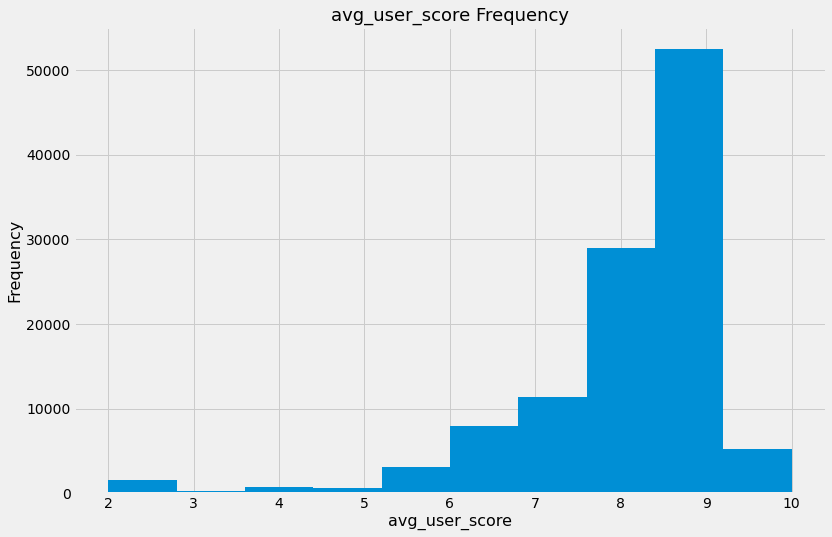

In [10]:
hist_plot('avg_user_score')

### From our historgam above we can see that our data is left skewed due to the outliers below average score of 6 (6.05 from min box plot value). Let's graph a histogram with these values omitted.

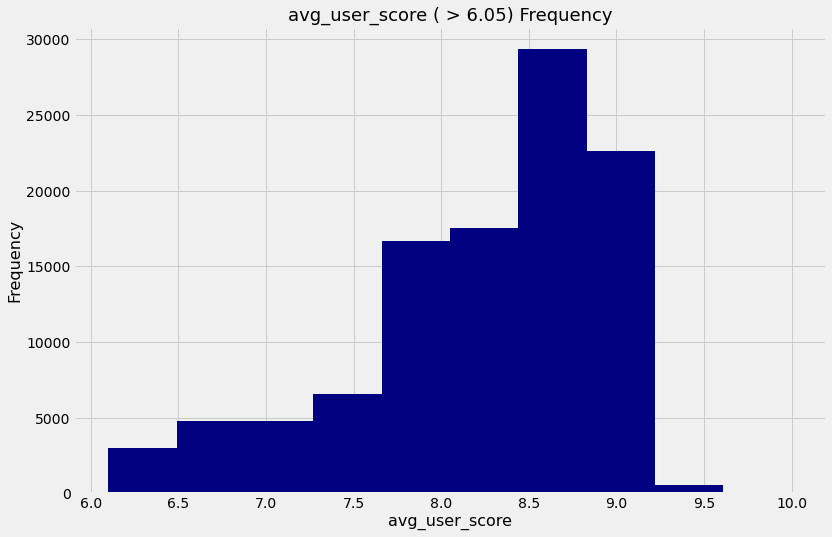

In [11]:
plt.figure(figsize=(12,8))
plt.hist(clean_reviews[clean_reviews['avg_user_score'] > 6.05]['avg_user_score'], rwidth=5, color='navy')
plt.title('avg_user_score ( > 6.05)' + ' Frequency',
         size=18)
plt.xlabel('avg_user_score', size=16)
plt.ylabel("Frequency", size=16)
plt.xticks(rotation=0, size=14);

### Looking at the frequency over average user scores above 6.05 we can still see that our data is still a bit left skewed


Min of boxplot: 6.05
Max of boxplot: 10.45


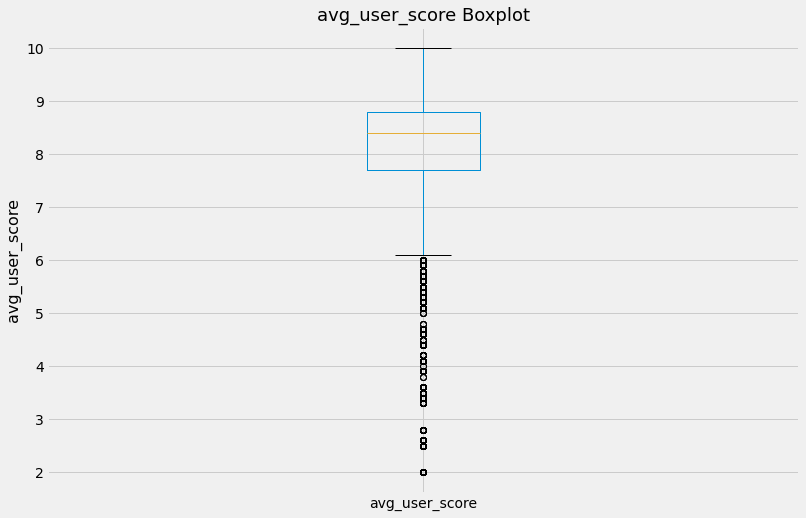

In [12]:
box_plot('avg_user_score')

### Here with the box plot we can more evidently see the outliers present. We can see we have a wider spread of values below the the median with clear outliers below 6.05. Let's continue with our EDA on the dataset and return to these outliers to see if removing them is the best course of action.

In [13]:
clean_reviews[clean_reviews['avg_user_score'] < 6.05]['avg_user_score']

4429      5.7
4430      5.7
4431      5.7
4432      5.7
4433      5.7
         ... 
112340    5.5
112341    5.5
112342    5.5
112343    5.5
112344    5.5
Name: avg_user_score, Length: 6603, dtype: float64

### If we were to remove data with average user score below 6.5 it would be 6,603 rows out of 112,345 rows, or roughly 5.87% of our data. We might also want to consider transforming our data to get a more normalized distribution. Again we will return to this if deemed the best course of action

## Let's create our target column from the `avg_user_score`, 1 for above the median and 0 for below the median

In [14]:
clean_reviews['target'] = (clean_reviews['avg_user_score'] >= \
                           clean_reviews['avg_user_score'].median()).astype(int)
clean_reviews.head(3)

,console,video_game_name,summary,developer,genre(s),num_players,esrb_rating,critic_score,avg_user_score,user_review,user_score,target
0,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,this site is a joke this the first time when i...,9,1
1,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,fair review of rdr2 im almost <number> finishe...,7,1
2,ps4,Red Dead Redemption 2,developed by the creators of grand theft auto ...,Rockstar Games,"Action Adventure, Open-World",32,M,97,8.6,i really wanted to love it the overworld is be...,6,1


## Now let's look at our first feature, `console`.

In [15]:
descriptive_stats('console')

count     112345
unique         6
top           pc
freq       32717
Name: console, dtype: object
     
# of Unique values:6     

Unique values: ['ps4' 'xboxone' 'switch' 'pc' 'xbox-series-x' 'ps5']


### From our descriptive stats we can see that we have 6 unique values with 'pc' being the most frequent

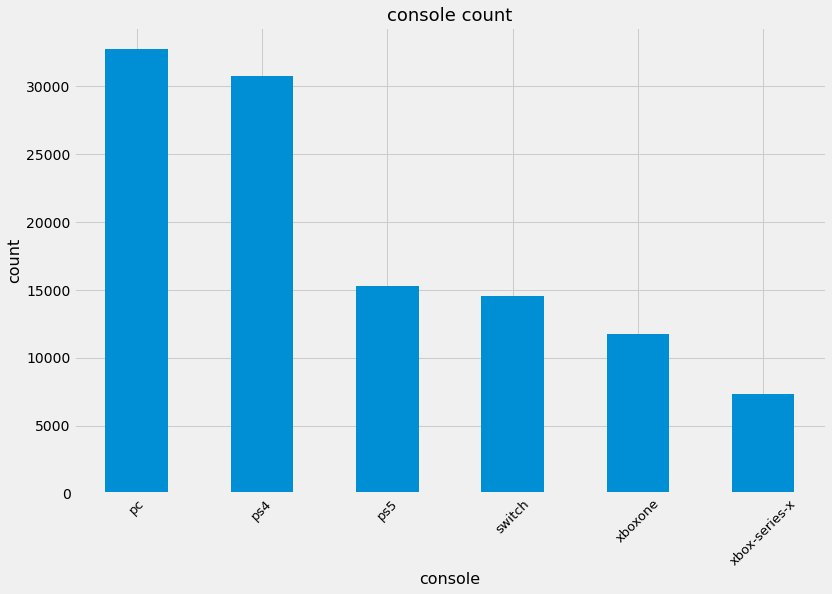

In [16]:
bar_graph('console')

### Looking at our bar graph we can see that we have more reviews for games on pc and ps4 with over 30k for each. Followed by ps5 and switch with each less than 50% of the previous 2, at around 15k reviews. Let's take a look at the distribution of mean average user score based on console.

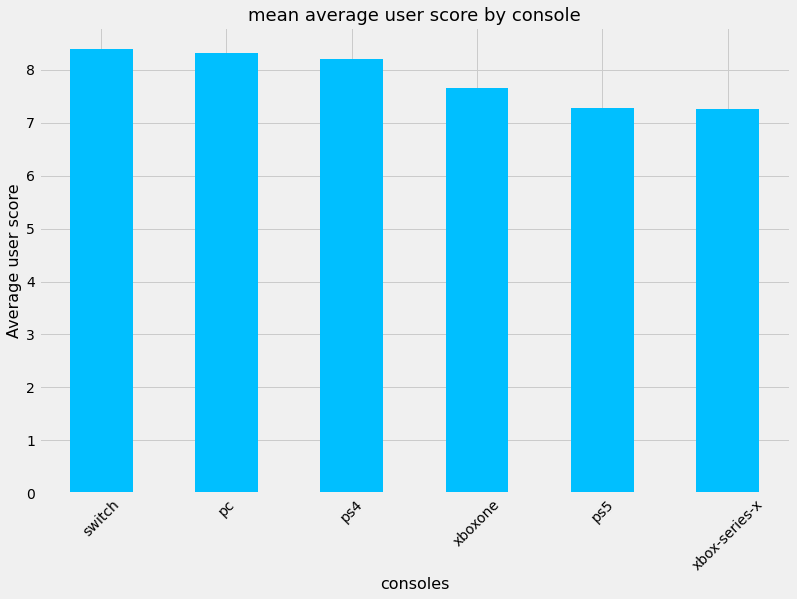

In [17]:
clean_reviews.groupby('console').mean().sort_values('avg_user_score', ascending=False)\
['avg_user_score'].plot(kind='bar', figsize=(12,8), color='deepskyblue')

plt.title('mean average user score by console', fontsize=18)

plt.ylabel('Average user score', fontsize=16)
plt.xlabel('consoles', fontsize=16)

plt.xticks(rotation=45, fontsize=14);

### From our bar chart grouped by console, we can see that all consoles have a mean average user score above 7 with switch, pc, and ps4 having the highest mean average user scores (above 8). Interesting to note that despite the difference in number of reviews for each console, the mean average user scores are all very similar.

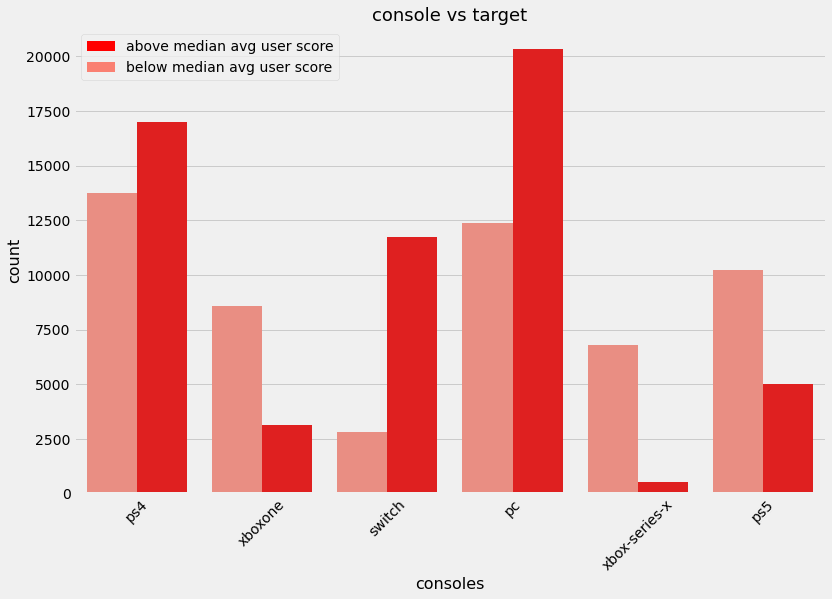

In [18]:
# https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55
# referenced site for grouped bar charts

plt.figure(figsize=(12,8))
sns.countplot(x='console', hue='target', data=clean_reviews, palette={1:'red', 0:'salmon'});

plt.title('console vs target', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('consoles', fontsize=16)

color_patches = [
    Patch(facecolor="red", label="above median avg user score"),
    Patch(facecolor="salmon", label="below median avg user score")
]

plt.legend(handles=color_patches)

plt.xticks(rotation=45, fontsize=14);

### In the bar chart above we plotted count of target values for each console. Ps4 reviews are the only ones that have almost an equal amount of reviews above and below the median average user score. Ps4, switch, and pc reviews have more reviews that are above the median average user score. XboxOne, Xbox Series X, and ps5 all have more review below the median average user score. This bar chart provides an interesting view on how different consoles have varying average review scores and in some cases a big disparity between above and below the median average user score. These discrepancies are good to be mindful of moving forward, they could potentially impact our model down the line.

## Let's look at our second feature, `video_game_name`.

In [19]:
descriptive_stats('video_game_name')

count                    112345
unique                      435
top       Red Dead Redemption 2
freq                       2989
Name: video_game_name, dtype: object
     
# of Unique values:435     

Unique values: ['Red Dead Redemption 2' 'Grand Theft Auto V' 'Persona 5 Royal'
 'The Last of Us Remastered' 'God of War' 'The Last of Us Part II'
 'Persona 5' 'Metal Gear Solid V: The Phantom Pain'
 "Uncharted 4: A Thief's End" 'Journey' 'Bloodborne' 'Undertale'
 'The Witcher 3: Wild Hunt'
 'Divinity: Original Sin II - Definitive Edition'
 'Final Fantasy XIV: Shadowbringers' 'Shadow of the Colossus'
 'The Witcher 3: Wild Hunt - Blood and Wine' 'Celeste' 'INSIDE'
 'NieR: Automata - Game of the YoRHa Edition' 'Resident Evil 2'
 'Dragon Quest XI S: Echoes of an Elusive Age - Definitive Edition'
 'flower' 'Diablo III: Ultimate Evil Edition' 'Overwatch' 'Shovel Knight'
 'Rayman Legends' 'Fez' 'Monster Hunter: World'
 'Tales From The Borderlands: Episode 5 - The Vault of the Traveler'
 'The Witc

### From our descriptive stats we can see that there are over 400 unique video games that show up in our data set. Out of those Red Dead Redemption has 2989 reviews making it the most frequent game in our dataset.

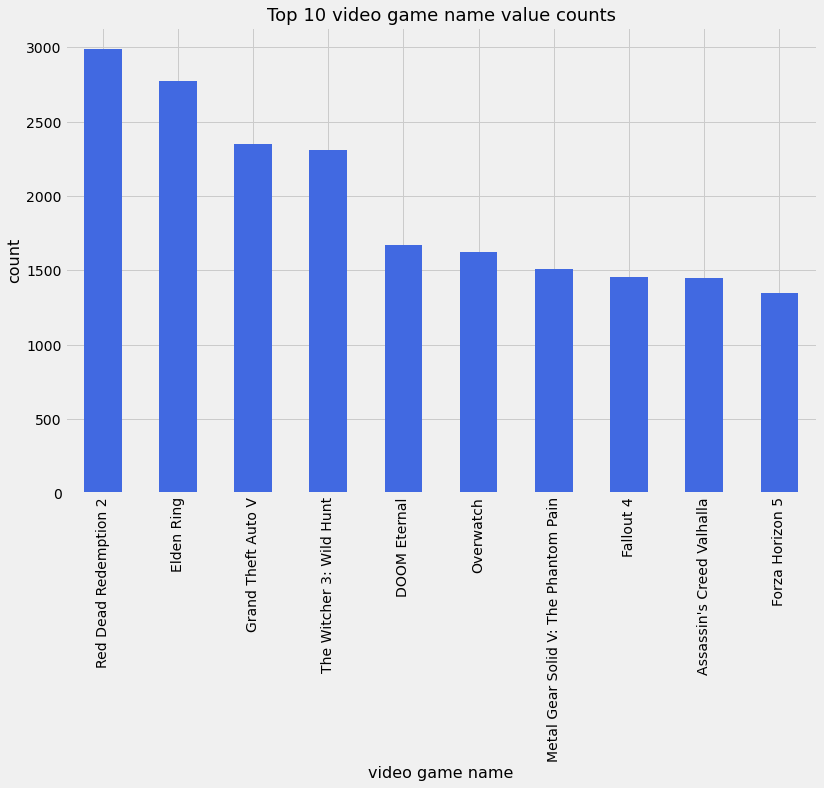

In [20]:
clean_reviews['video_game_name'].value_counts()[:10].plot(kind='bar', figsize=(12,8), color='royalblue')

plt.title('Top 10 video game name value counts', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('video game name', fontsize=16)

plt.xticks(fontsize=14);

### Here we see how many times a video game had a review in our dataset. The 4 most frequent are Red Dead Redemption 2, Elden Ring, Grand Theft Auto V, and The Witcher 3: Wild Hunt all of which had over 2000 reviews. When web scraping we capped it at 10 pages of user review, so 1000 reviews per console. The top 4 games must have shown up for more than one console if they have over 1000 reviews.

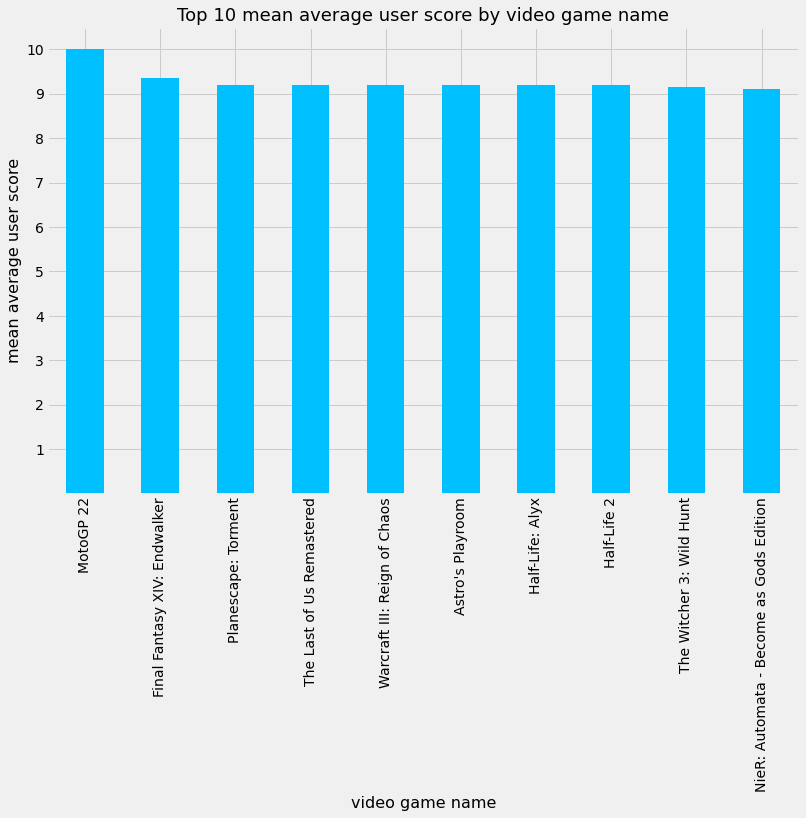

In [21]:
clean_reviews.groupby('video_game_name').mean().sort_values('avg_user_score', ascending=False)\
['avg_user_score'][:10].plot(kind='bar', figsize=(12,8), color='deepskyblue')

plt.title('Top 10 mean average user score by video game name', fontsize=18)

plt.ylabel('mean average user score', fontsize=16)
plt.xlabel('video game name', fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(range(1,11));

In [22]:
top_10_mean_avg_user_score = clean_reviews.groupby('video_game_name').mean().sort_values\
('avg_user_score', ascending=False)['avg_user_score'][:10].index

clean_reviews.loc[clean_reviews['video_game_name'].isin(top_10_mean_avg_user_score)]\
.groupby('video_game_name').count()[['console']].sort_values('console', ascending=False)

,console
video_game_name,
The Witcher 3: Wild Hunt,2308
Half-Life 2,1000
The Last of Us Remastered,900
Half-Life: Alyx,772
Final Fantasy XIV: Endwalker,625
Astro's Playroom,424
Warcraft III: Reign of Chaos,238
Planescape: Torment,163
NieR: Automata - Become as Gods Edition,112


### Looking at the bar chart above it is interesting to note that the only game from our top 10 most frequent that shows up in this plot is The Witcher 3: Wild Hunt. This means that not only were there several reviews for The Witcher 3 but they were also highly rated user reviews. One thing to be cautious about with the above is that some of these games, like MotoGP 22 had very few user reviews, a total of 11. While all the other games on this top 10 list had at least 100 reviews if not more.

In [23]:
top_10_most_frequent_games = clean_reviews['video_game_name'].value_counts()[:10].index

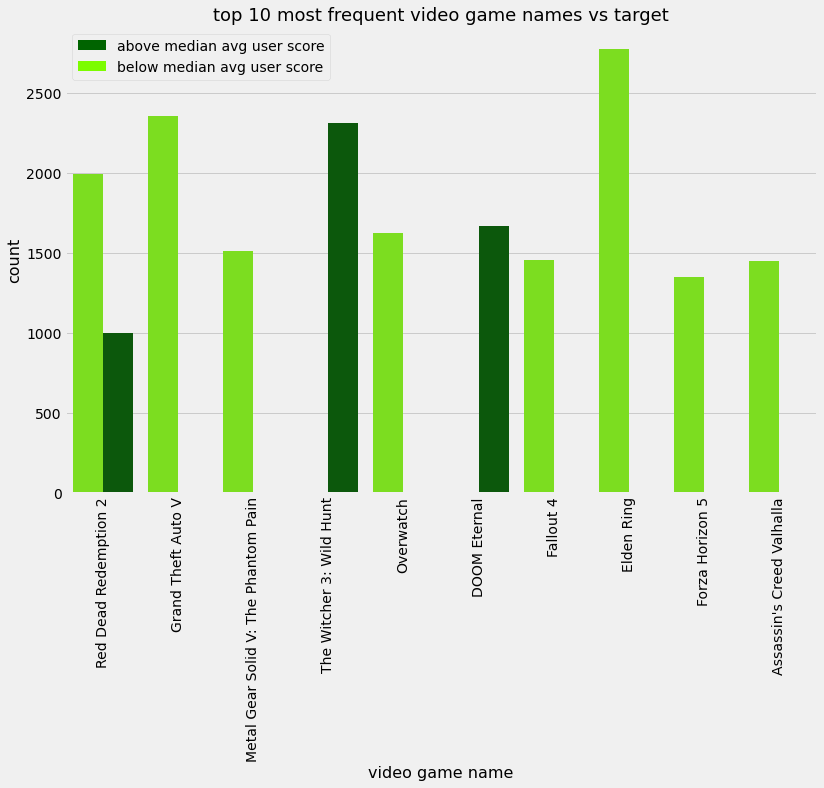

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='video_game_name', hue='target', 
              data=clean_reviews.loc[clean_reviews['video_game_name']\
                                     .isin(top_10_most_frequent_games)], 
              palette={1:'darkgreen', 0:'lawngreen'});

plt.title('top 10 most frequent video game names vs target', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('video game name', fontsize=16)

color_patches = [
    Patch(facecolor="darkgreen", label="above median avg user score"),
    Patch(facecolor="lawngreen", label="below median avg user score")
]

plt.legend(handles=color_patches)

plt.xticks(rotation=90, fontsize=14);

### Interesting to see that the top 10 most frequent only had 3 that were above the median avg user score. Red Dead Redemption 2 is interesting to see that it has both above/below the median. This most likely indicates that on one console the user reviews were above the median while on another they were below. This can happen when developers make a subpar port to a console, usually pc, which leads to bad reviews.

In [25]:
# DELETE THIS LATER BUT THINK ABOUT WHAT THE TARGET VARIABLE SHOULD REPRESENT
# Currently the target is the median avg_user_score for ALL the reviews. BUT there are some games with a lot
    # of reviews which skews the median. 
# The way shown below groups ALL the video games together, then looks at the mean avg_user_score THEN finds
    # the median value of that. NEED GUIDANCE ON WHAT IS RIGHT. 
# Below is the median for ALL 435 video games in the dataset. So roughly 217 video games are above/below the med
    # of 8 BUT that does not mean that 50% of ALL the reviews in this dataset are going to be above/below THIS med val
clean_reviews.groupby('video_game_name').describe()['avg_user_score']['mean'].describe()

# Changed target to be >= 8 and it created a class imbalance, 1 - 74108, 0 - 38237
# compared to the original which was 1- 57740, 0 - 54605. NEED GUIDANCE
# MAYBE change target to above/below med critic score?????? OR median regular user score????

count    435.000000
mean       7.662316
std        1.213293
min        2.000000
25%        7.200000
50%        8.000000
75%        8.500000
max       10.000000
Name: mean, dtype: float64

In [26]:
# DELETE LATER
clean_reviews[clean_reviews['target'] == 0].groupby('video_game_name').count().sort_values('console', ascending=False)

,console,summary,developer,genre(s),num_players,esrb_rating,critic_score,avg_user_score,user_review,user_score,target
video_game_name,,,,,,,,,,,
Elden Ring,2773,2773,2773,2773,2773,2773,2773,2773,2772,2773,2773
Grand Theft Auto V,2351,2351,2351,2351,2351,2351,2351,2351,2348,2351,2351
Red Dead Redemption 2,1989,1989,1989,1989,1989,1989,1989,1989,1986,1989,1989
Overwatch,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623
Metal Gear Solid V: The Phantom Pain,1510,1510,1510,1510,1510,1510,1510,1510,1509,1510,1510
...,...,...,...,...,...,...,...,...,...,...,...
Samurai Shodown: Special Edition,2,2,2,2,2,2,2,2,2,2,2
Lawn Mowing Simulator,2,2,2,2,2,2,2,2,2,2,2
Assassin's Creed Valhalla: Dawn of Ragnarok,2,2,2,2,2,2,2,2,2,2,2


## Let's look at our, `developer` feature.

In [27]:
descriptive_stats('developer')

count            112345
unique              257
top       From Software
freq               6816
Name: developer, dtype: object
     
# of Unique values:257     

Unique values: ['Rockstar Games' 'Rockstar North' 'Atlus' 'Naughty Dog'
 'SCE Santa Monica' 'Kojima Productions' 'Tricky Pixels' 'From Software'
 'tobyfox' 'CD Projekt Red Studio' 'Larian Studios Games' 'Square Enix'
 'Bluepoint Games' 'Matt Makes Games Inc.' 'PLAYDEAD' 'PlatinumGames'
 'Capcom R&D Division 1' 'Blizzard Entertainment' 'Yacht Club Games'
 'Ubisoft Montpellier' 'Polytron Corp.' 'Capcom' 'Telltale Games'
 'JapanStudio' 'Q Entertainment' 'Respawn Entertainment' 'Enhance Games'
 'Hazelight' 'Supergiant Games' 'Media Molecule' 'BioWare'
 'Vicarious Visions' 'EA DICE' 'Guerrilla' '4J Studios' 'Giant Sparrow'
 'Nicalis' 'Crystal Dynamics' 'Visual Concepts' 'Arkane Studios'
 'NetherRealm Studios' 'Mega Crit Games' 'BlitWorks' 'Steel Crate Games'
 'Croteam' 'Cloudhead Games' 'Housemarque' 'Team Ninja'
 'Cardboard Comput

### We have 257 unique developers, considering we have over 400 unique video game names this shows that we have developers that show up more than once for different video games. Our most frequent developer is From Software.

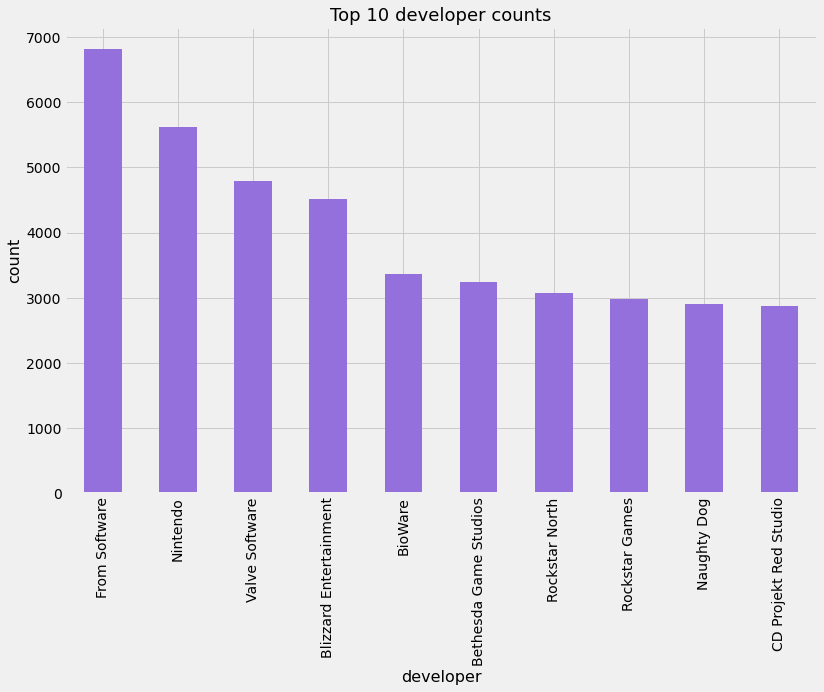

In [28]:
clean_reviews['developer'].value_counts()[:10].plot(kind='bar', figsize=(12,8), color='mediumpurple')

plt.title('Top 10 developer counts', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('developer', fontsize=16)

plt.xticks(fontsize=14);

### The above bar chart shows the top 10 most frequent developers in our dataset. Its important to note that some games might have more reviews and thus the developer associated with that game review will show up more. Still shows that the top 4 developers, From Software, Nintendo, Valve Software, and Blizzard Entertainment, have over 4000 reviews for their associated games which indicates a lot of user interactions/feedback.

In [29]:
top_10_frequent_developers = clean_reviews['developer'].value_counts()[:10].index

# This shows how many unique game names show up in our dataset of top 100 games across 6 consoles
# for top 10 most frequent developers
df_developer_num_games = clean_reviews.loc[clean_reviews['developer'].isin(top_10_frequent_developers)]\
.groupby(['developer', 'video_game_name']).size().reset_index(name='num_reviews')['developer'].value_counts()

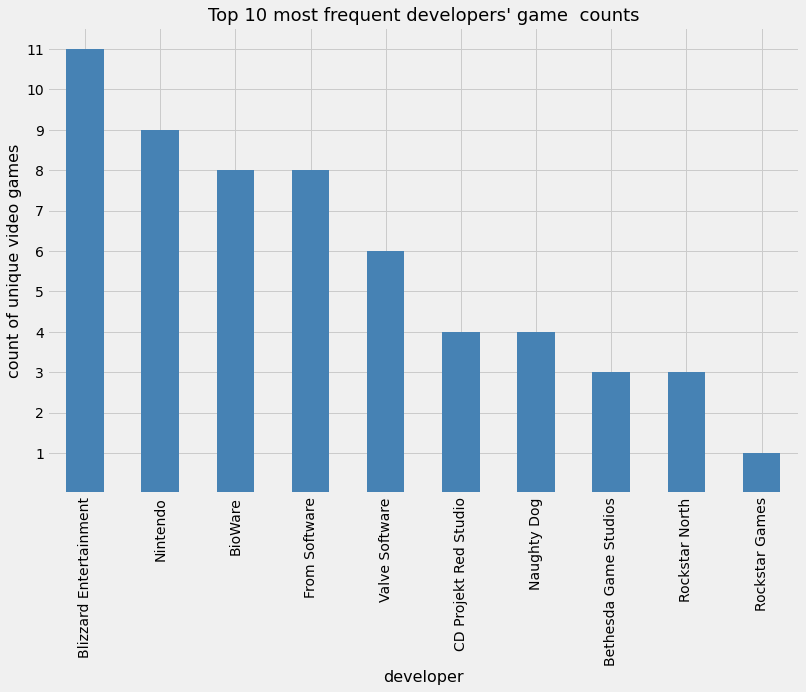

In [30]:
df_developer_num_games.plot(kind='bar', figsize=(12,8), color='steelblue')

plt.title('Top 10 most frequent developers\' game  counts', fontsize=18)

plt.ylabel('count of unique video games', fontsize=16)
plt.xlabel('developer', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(range(1, 12));

### Here we have the list of the top 10 most frequent developers and the number of how many unique games they have in our dataset. Interesting to see that From Software had over 6000 reviews but has the 4th most unique games in our dataset. Nintendo keeps its second place spot and Blizzard actually has the most unique games in our dataset with 11.

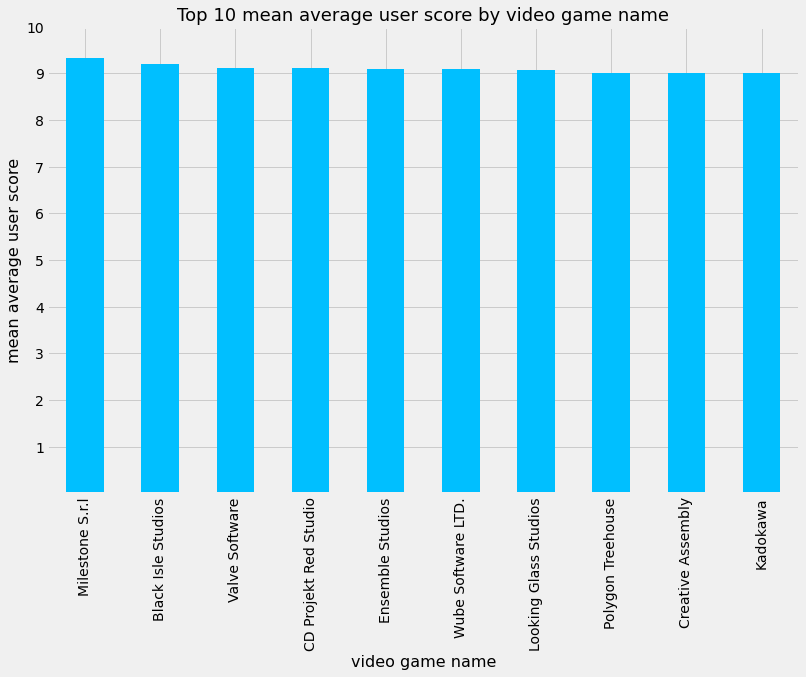

In [31]:
clean_reviews.groupby('developer').mean().sort_values('avg_user_score', ascending=False)\
['avg_user_score'][:10].plot(kind='bar', figsize=(12,8), color='deepskyblue')

plt.title('Top 10 mean average user score by video game name', fontsize=18)

plt.ylabel('mean average user score', fontsize=16)
plt.xlabel('video game name', fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(range(1,11));

### The chart above shows the top 10 mean average user score grouped by video game. The top 10 all have an average of 9 or more. Interesting to note that Valve and CD Projekt Red Studio are the only 2 studios with the most reviews in our dataset that also are in the top 10 average user score. Shows that having more reviews does not necessarily mean a higher average user score.

In [32]:
# DELETE LATER
# This is all the unique video games in dataset
clean_reviews['video_game_name'].nunique()

435

In [33]:
# DELETE LATER: The TRUE number of unique video games that are above the median
clean_reviews[clean_reviews['avg_user_score'] > 8.4]['video_game_name'].nunique()

127

In [34]:
# DELETE LATER, this shows all the reviews with a video game name that has avg user score above med (target of 1)
df = clean_reviews.groupby('video_game_name').mean()
list_games_above_med = df[df['avg_user_score'] > 8.4].index

# only 120 games in dataset score above target (less than 50% of ALL video games)
# Either have imbalance reviews or imbalance video games scoring above target!!!!!!!!!!!!!!!!!!!!
# THIS IS ESSENTIALLY THE DILEMMA!!!!
print(len(list_games_above_med))
clean_reviews.loc[clean_reviews['video_game_name'].isin(list_games_above_med)].head(2)

120


,console,video_game_name,summary,developer,genre(s),num_players,esrb_rating,critic_score,avg_user_score,user_review,user_score,target
1753,ps4,Persona 5 Royal,prepare for an allnew rpg experience in person...,Atlus,"Role-Playing, Japanese-Style",1,M,95,8.5,eu sou lindo,10,1
1754,ps4,Persona 5 Royal,prepare for an allnew rpg experience in person...,Atlus,"Role-Playing, Japanese-Style",1,M,95,8.5,base persona <number> was a masterpiece not my...,9,1


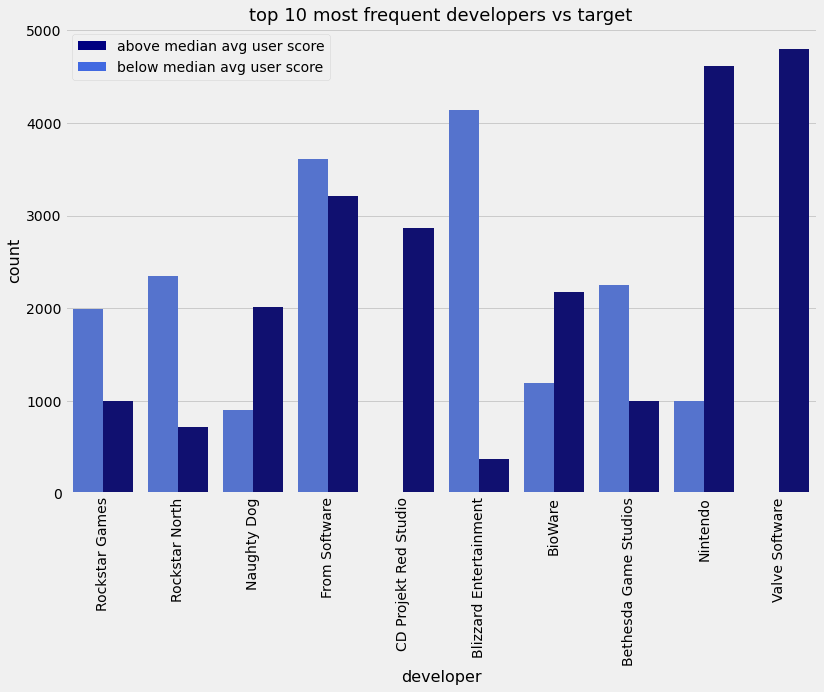

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='developer', hue='target', 
              data=clean_reviews.loc[clean_reviews['developer']\
                                     .isin(top_10_frequent_developers)], 
              palette={1:'navy', 0:'royalblue'});

plt.title('top 10 most frequent developers vs target', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('developer', fontsize=16)

color_patches = [
    Patch(facecolor="navy", label="above median avg user score"),
    Patch(facecolor="royalblue", label="below median avg user score")
]

plt.legend(handles=color_patches)

plt.xticks(rotation=90, fontsize=14);

### Interesting to see that for CD Projekt Red Studio and Valve Software all of their reviews were for games that were above the median average user score. Nintendo also has a lot more above then below the median. Blizzart Entertainment on the other hand has the biggest difference between games below the median age rather than above. The top 10 most frequent developers have an even split of 5 developers with mostly games with reviews above median average user score and below the median score.

## Now let's look at our, `genre(s)` feature.

In [36]:
descriptive_stats('genre(s)')

count                           112345
unique                             184
top       Action Adventure, Open-World
freq                              9653
Name: genre(s), dtype: object
     
# of Unique values:184     

Unique values: ['Action Adventure, Open-World' 'Action Adventure, Modern, Open-World'
 'Role-Playing, Japanese-Style' 'Action Adventure, General, Modern'
 'Action Adventure, Linear' 'General, Action Adventure, Survival'
 'Modern, Action Adventure, Modern, Open-World'
 'General, Modern, Action Adventure, Linear' 'Action, Platformer, 3D'
 'Fantasy, Role-Playing, Action Adventure, General, Action RPG'
 'Action RPG, Role-Playing, Action RPG' 'Role-Playing, Western-Style'
 'Role-Playing, Massively Multiplayer' 'Action Adventure, General'
 'Role-Playing, Action RPG' 'Action, Platformer, 2D'
 'Action Adventure, Survival' 'General, Miscellaneous, General'
 'Action, Shooter, First-Person, Tactical'
 'Platformer, 2D, Action, Platformer, 2D'
 'Action, Platformer, Platformer, 2D, 

### Action adventure, Open World is our most common genre with over 9000 reviews in this genre.

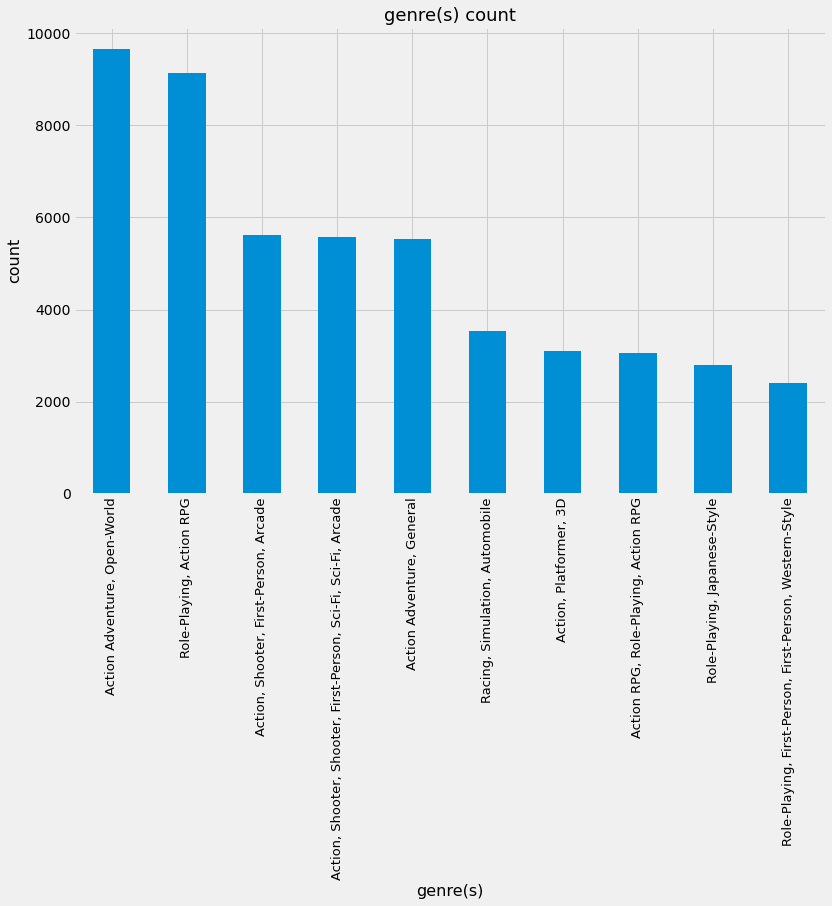

In [37]:
bar_graph('genre(s)')

### Interesting to see that 7 out of our top 10 most frequent genres have the word "Action" in the genre. Our top 2 genres (Action Adventure, Open-World and Role-Playing, Action RPG) have over 9000 reviews, so multiple games with these genres.

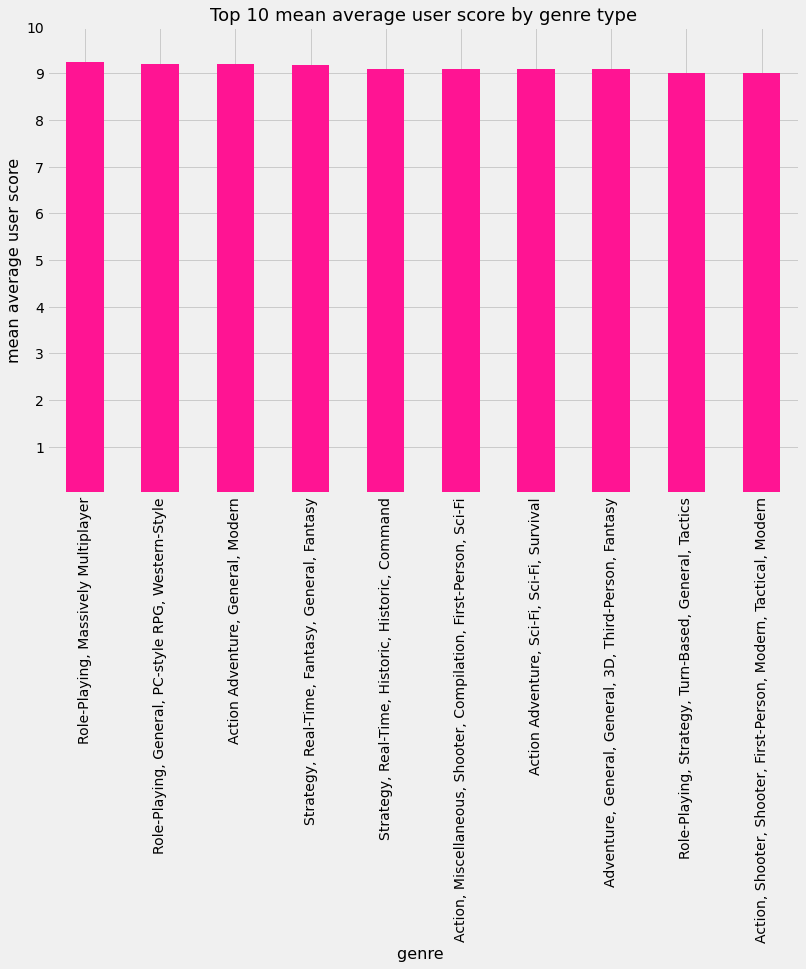

In [38]:
clean_reviews.groupby('genre(s)').mean().sort_values('avg_user_score', ascending=False)\
['avg_user_score'][:10].plot(kind='bar', figsize=(12,8), color='deeppink')

plt.title('Top 10 mean average user score by genre type', fontsize=18)

plt.ylabel('mean average user score', fontsize=16)
plt.xlabel('genre ', fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(range(1,11));

### For our chart with mean average user score by genre type, we see the top 10 genres all have a mean average score of 9 or more. The word "Action" only shows up 4 times in this chart, almost 50% less than its appearance in most frequent. Role playing and Strategy genres show up a few times in this as well while they have a smaller presense in our most frequent plot.

In [39]:
top_10_frequent_genres = clean_reviews['genre(s)'].value_counts()[:10].index

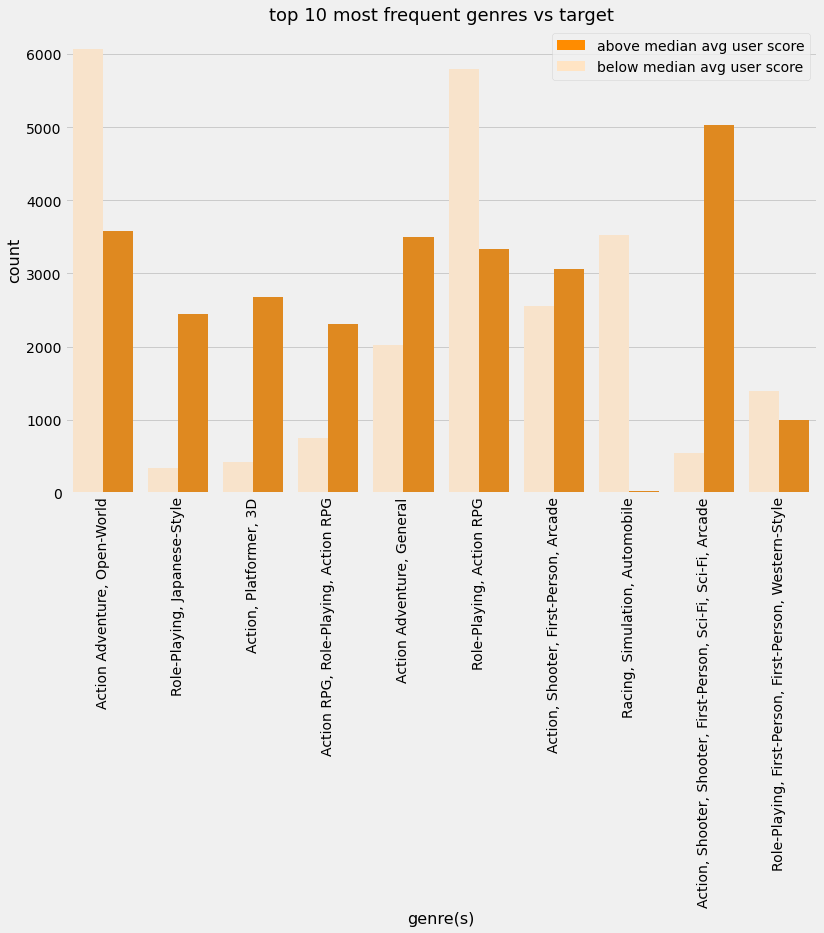

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x='genre(s)', hue='target', 
              data=clean_reviews.loc[clean_reviews['genre(s)']\
                                     .isin(top_10_frequent_genres)], 
              palette={1:'darkorange', 0:'bisque'});

plt.title('top 10 most frequent genres vs target', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('genre(s)', fontsize=16)

color_patches = [
    Patch(facecolor="darkorange", label="above median avg user score"),
    Patch(facecolor="bisque", label="below median avg user score")
]

plt.legend(handles=color_patches)

plt.xticks(rotation=90, fontsize=14);

### 6 of the top 10 most frequent genres have more reviews for games that are above the median average user score than below. Action Adventure, Open World was our most frequent and also has the most reviews for games that are below the median average user score. There might have been a certain game that garnered a lot of negative user reviews in this genre.

## Now let's look at `num_players` column.

In [41]:
descriptive_stats('num_players')

count    112345.000000
mean         10.257315
std          23.384023
min           1.000000
25%           1.000000
50%           1.000000
75%           8.000000
max         150.000000
Name: num_players, dtype: float64
     
# of Unique values:22     

Unique values: [ 32  30   1   8  16  10   2   5   4  12   6 150  60 100  64   3  22  20
  24  18  14  40]

Min of boxplot:-9.50
Max of boxplot: 18.50


### Our data contains 22 unique number of players for our video games. Our median is 1, indicating that over 50,000 reviews are for single player video games.

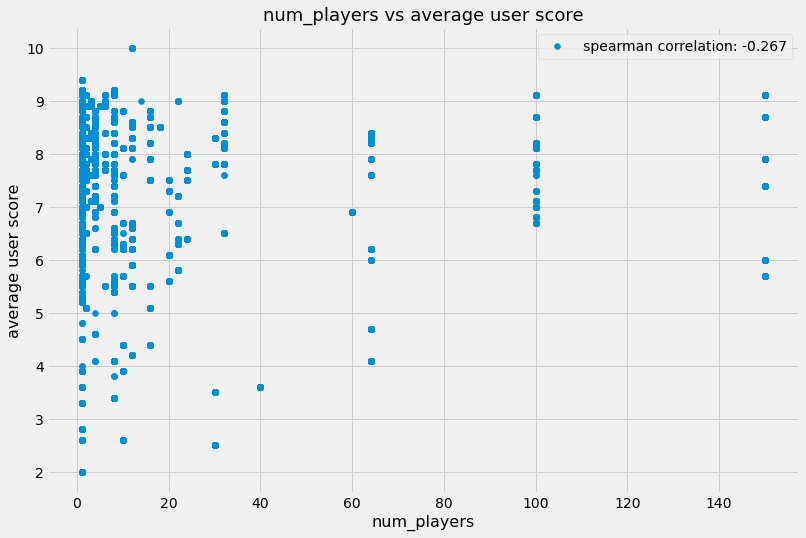

In [42]:
scatter_plot('num_players')

### Our scatter plot here with our target variable does not show a strong linear correlation. According to the spearman correlation, a nonparametric measure of rank correlation which assesses how well the relationship between 2 variables can be described using a monotonic function, of -0.267 we have a bit of a negative relationship between num of players and average user score. 

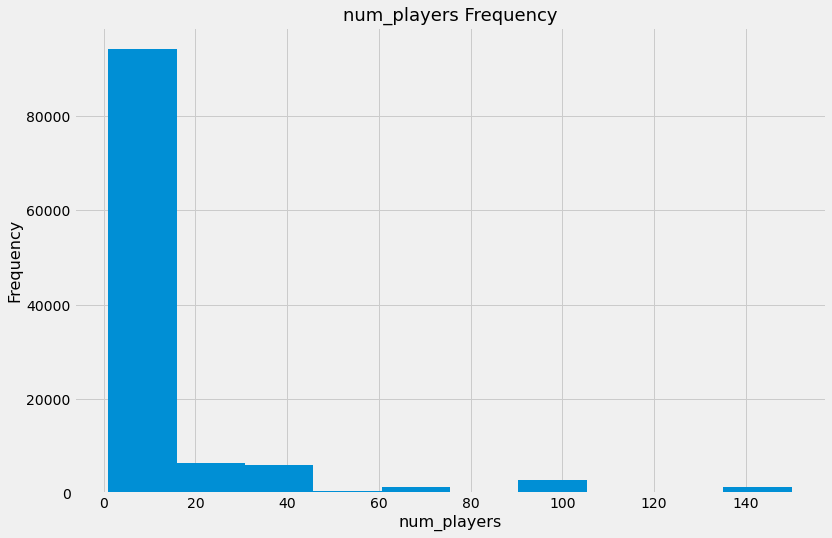

In [43]:
hist_plot('num_players')

### From our histogram above we can see that the numer of reviews for games with less than 20 players, mostly single player or co-op games, show up for over 70% of our dataset. Games with over 100 players, usually MMOs or battle royales, have a much smaller frequency and are underrepresented in our data.

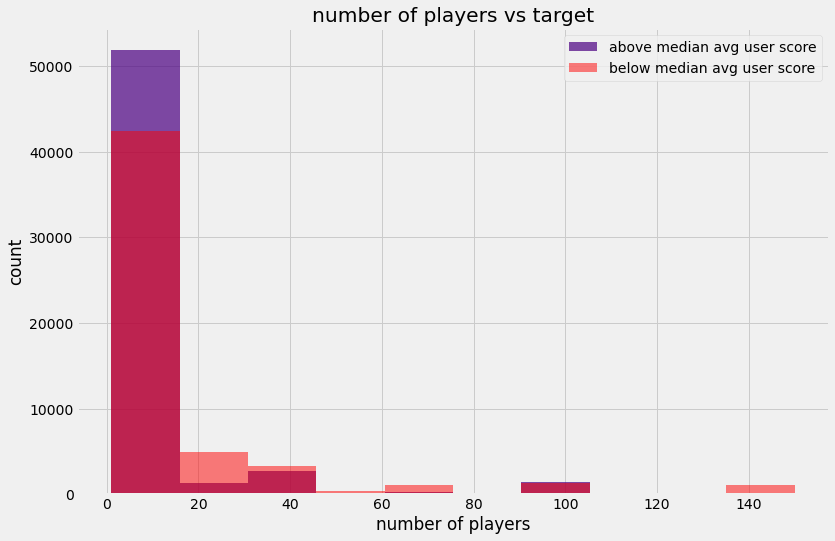

In [44]:
plt.figure(figsize=(12,8))
plt.hist(clean_reviews[clean_reviews['target']==1]['num_players'], 
         bins=10, alpha=0.7, color='indigo', label='above median avg user score')
plt.hist(clean_reviews[clean_reviews['target']==0]['num_players'], 
         bins=10, alpha=0.5, color='red', label='below median avg user score')

plt.xlabel('number of players')
plt.ylabel('count')

plt.title('number of players vs target')

plt.legend();

### From the histogram above we can see that there are over 50k reviews for games with less than 20 players that are above the median, but also a lot that are below. 


Min of boxplot:-9.50
Max of boxplot: 18.50


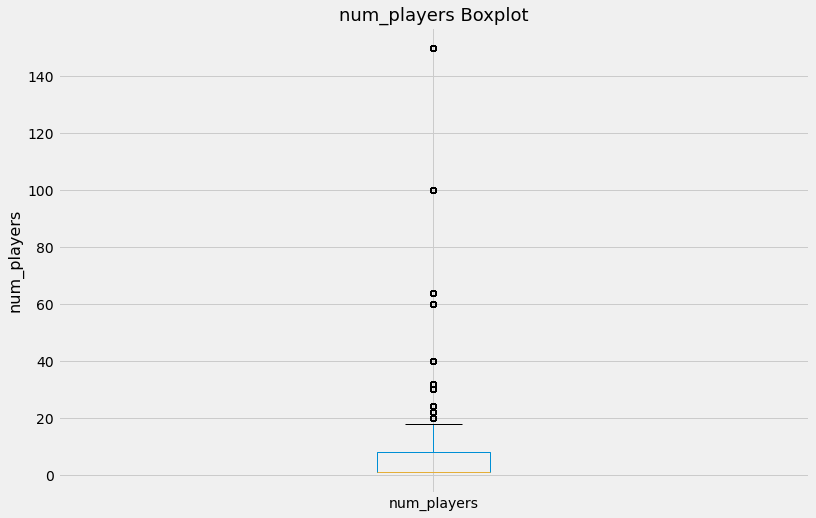

In [45]:
box_plot('num_players')

### Looking at our box plot we have potential outliers above the max of 18 players. We do not want to remove these outliers however, because they specifically relate to games like MMOs and battle royales. Interesting to see that the overwhelming majority of our game reviews belong to games with number of players less than 20.

## Now let's look at `esrb_rating` column.

In [46]:
descriptive_stats('esrb_rating')

count     112345
unique         4
top            M
freq       60200
Name: esrb_rating, dtype: object
     
# of Unique values:4     

Unique values: ['M' 'T' 'E' 'E10+']


### We only have 4 unique ratings in this column. M being the most frequent with over 60k occurances.

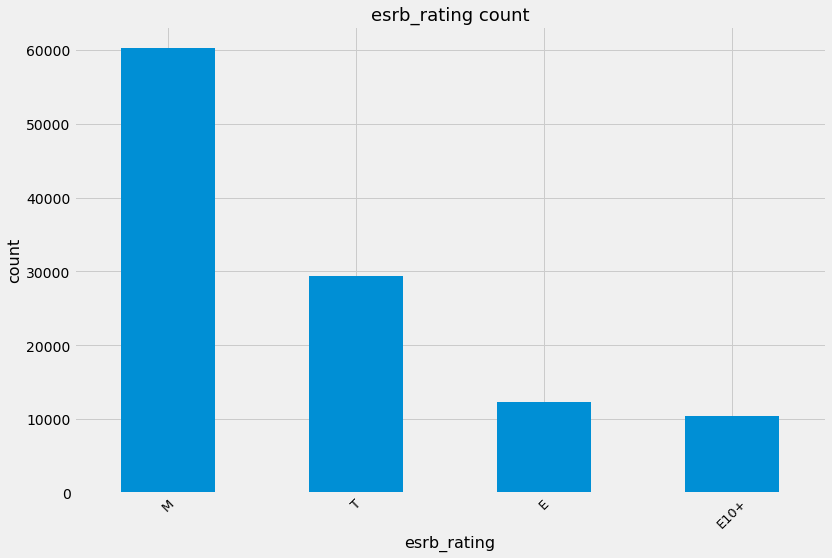

In [47]:
bar_graph('esrb_rating')

### Again we can see that M rated games have the most reviews, followed by T rated games which are less than half of M rated. E and E10+ fall short with less than 15k for each.

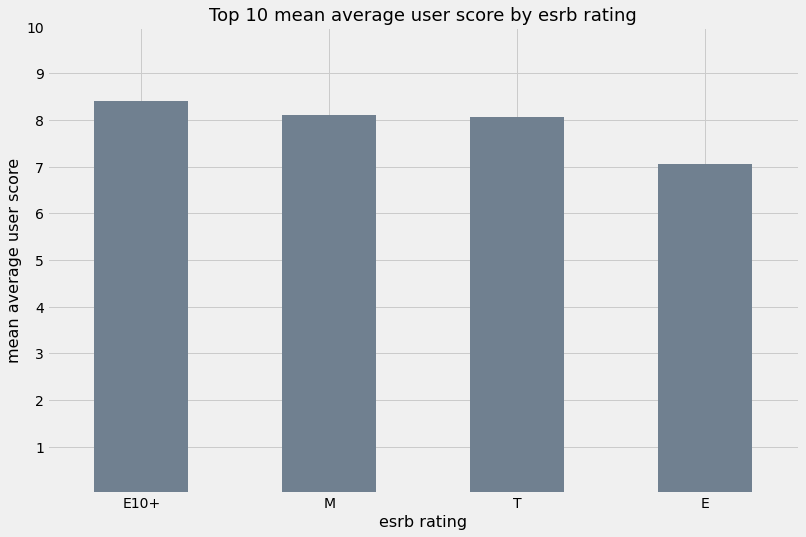

In [48]:
clean_reviews.groupby('esrb_rating').mean().sort_values('avg_user_score', ascending=False)\
['avg_user_score'].plot(kind='bar', figsize=(12,8), color='slategrey')

plt.title('Top 10 mean average user score by esrb rating', fontsize=18)

plt.ylabel('mean average user score', fontsize=16)
plt.xlabel('esrb rating', fontsize=16)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(range(1,11));

### E10+ has the highest mean average user score, with only E rated games falling below a mean average user score of 8 with slightly above 7. 

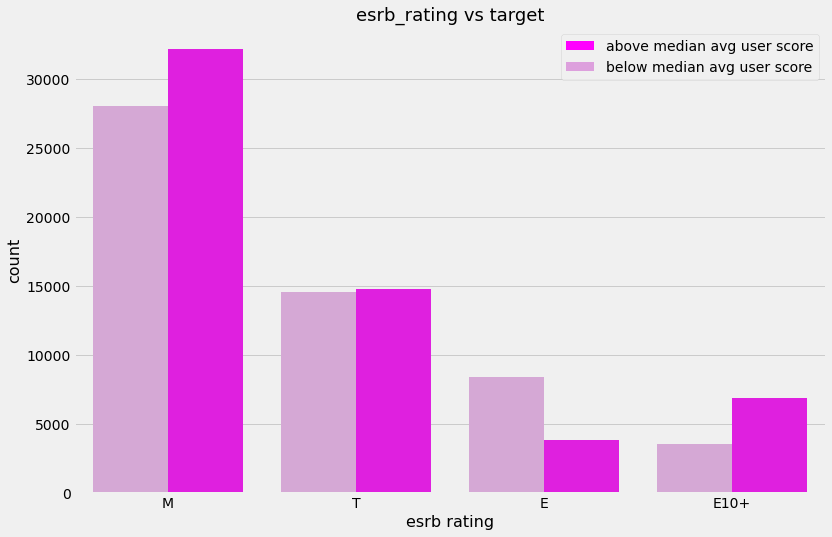

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x='esrb_rating', hue='target', data=clean_reviews, palette={1:'magenta', 0:'plum'});

plt.title('esrb_rating vs target', fontsize=18)

plt.ylabel('count', fontsize=16)
plt.xlabel('esrb rating', fontsize=16)

color_patches = [
    Patch(facecolor="magenta", label="above median avg user score"),
    Patch(facecolor="plum", label="below median avg user score")
]

plt.legend(handles=color_patches)

plt.xticks(rotation=0, fontsize=14);

### M rated games have more reviews for games with above the median avg user score. T rated games have almost and even split with slightly more reviews for games above the median avg user score. E rated games are the only ones that have more reviews for games below the median avg user score.

## Let's look at `critic_score` feature.

In [50]:
descriptive_stats('critic_score')

count    112345.000000
mean         89.983782
std           4.238149
min          72.000000
25%          87.000000
50%          91.000000
75%          93.000000
max          97.000000
Name: critic_score, dtype: float64
     
# of Unique values:26     

Unique values: [97 95 94 93 92 91 90 89 88 87 86 85 96 84 83 82 81 80 79 78 77 76 75 74
 73 72]

Min of boxplot: 78.00
Max of boxplot: 102.00


### Interesting to see that our lowest critic score was 72 and over 50% are 90+

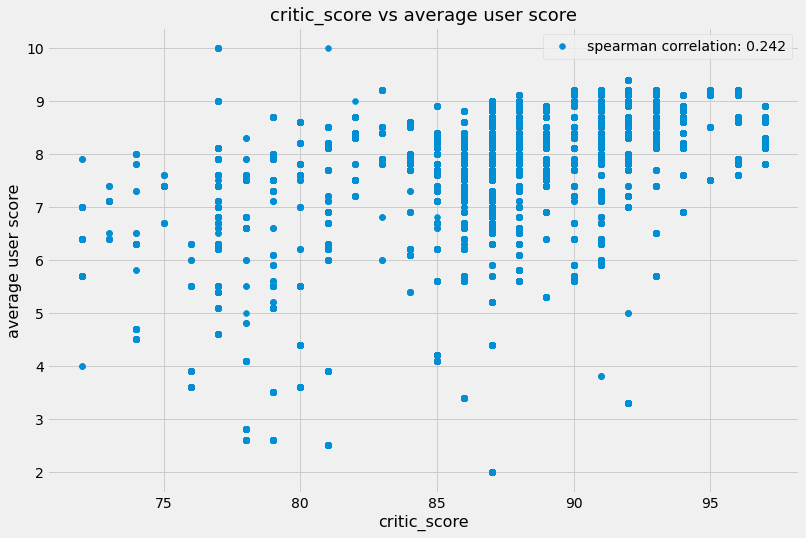

In [51]:
scatter_plot('critic_score')

### Our scatter plot shows that there is a bit of a positive relationship between critic score and average user score. The spearman coefficient of 0.242 also backs it up. Not the cleanest relationship but still a bit noticeable.

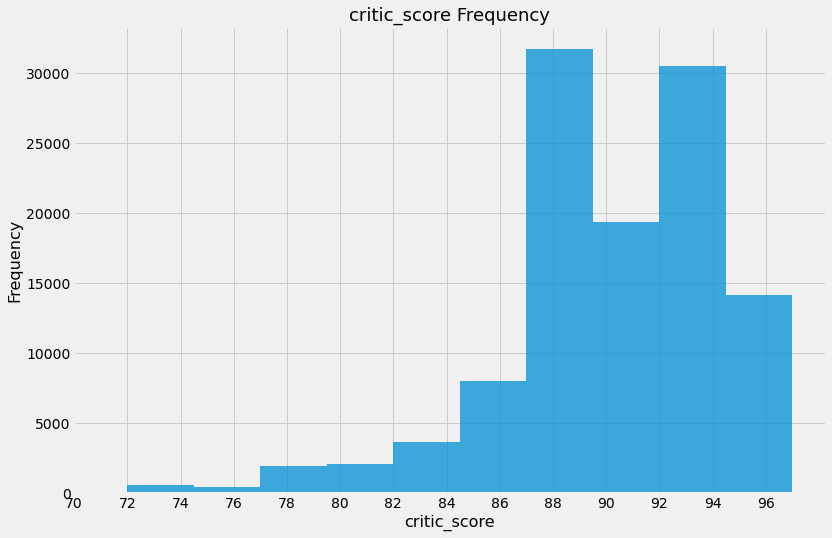

In [52]:
hist_plot('critic_score')

### Our histogram shows that games with a critic score of 87-89 had the most reviews with over 30k. Followed closely by games with critic score of 92-94. 72-77 critic scores had the least number of reviews. Shows that our data is left skewed. You would not expect games in a top 100 list to have a critic score in the 70s or low 80s. This colud be do to the new consoles, ps5 and xbox series x, since these are newer consoles with less games some of the top 100 games probably have lower critic scores.

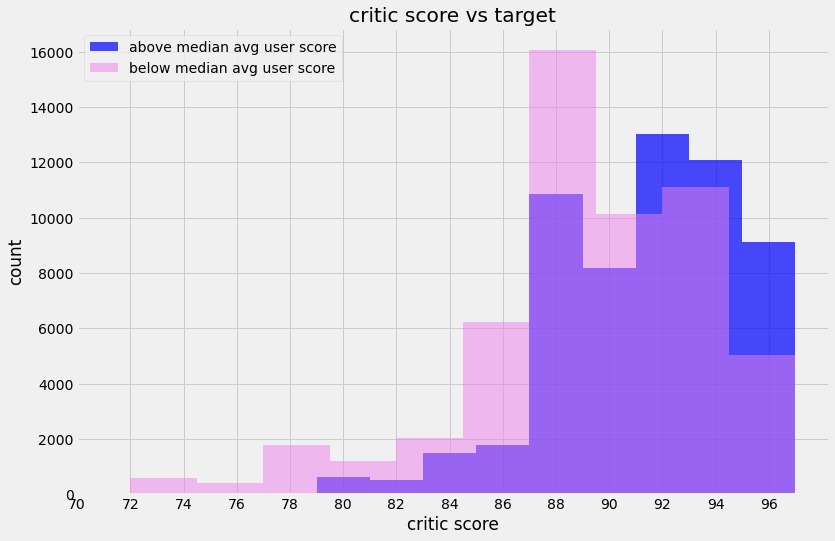

In [53]:
plt.figure(figsize=(12,8))
plt.hist(clean_reviews[clean_reviews['target']==1]['critic_score'], 
         bins=10, alpha=0.7, color='blue', label='above median avg user score')
plt.hist(clean_reviews[clean_reviews['target']==0]['critic_score'], 
         bins=10, alpha=0.5, color='violet', label='below median avg user score')

plt.xlabel('critic score')
plt.ylabel('count')
plt.xticks(range(70, 98, 2))

plt.title('critic score vs target')

plt.legend();

### From our histogram above we can see that reviews of a game with a critic score of 87-89 had roughly 16k reviews of games that were below the median average user score. Games with a critic score of 91-97 had primarily more reviews of games that were above the median average user score than below.


Min of boxplot: 78.00
Max of boxplot: 102.00


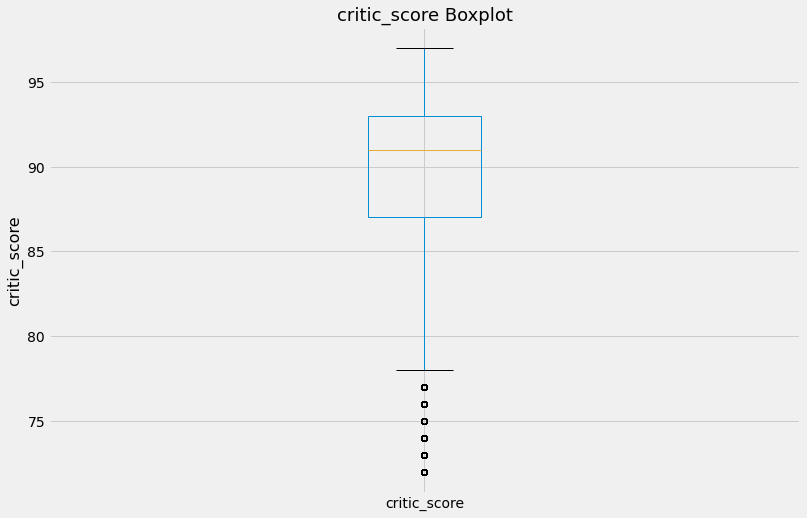

In [54]:
box_plot('critic_score')

### Our box plot backups up or idea that it is uncommon for games in the top 100 list to have such low scores. Anything below a critic score of 78 could be considered an outlier. Let's continue with our EDA but potentially return to remove these outliers before modeling.

## Finally let's check our `user_score` column.

In [55]:
descriptive_stats('user_score')

count    112345.000000
mean          7.823704
std           3.249963
min           0.000000
25%           7.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: user_score, dtype: float64
     
# of Unique values:11     

Unique values: [ 9  7  6  5  8 10  4  3  2  0  1]

Min of boxplot: 2.50
Max of boxplot: 14.50


### We have user scores in reviews that have every single possible score that colud be given. Over 50% of our dataset have reviews with user scores above 9.

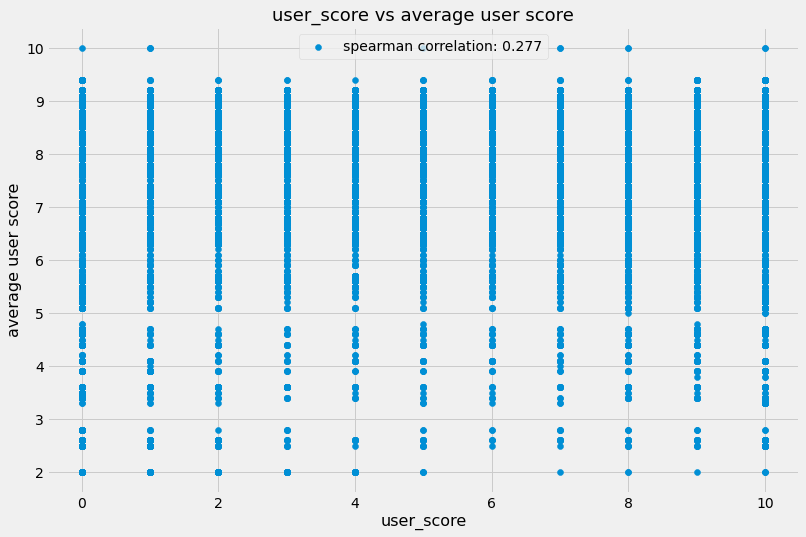

In [56]:
scatter_plot('user_score')

### You would expect to see a much clearer relationship between user score and average user score but that is not what we see in our scatter plot. Our spearman correlation is at 0.277 which shows some sense of a positive relationship.

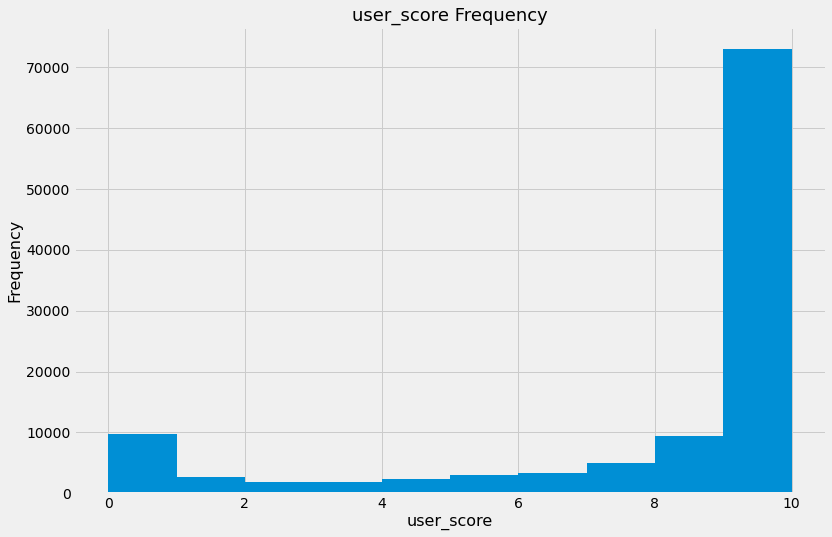

In [57]:
hist_plot('user_score')

### User scores above 9 are by far the most frequent with over 70k. The rest of the scores are below 10k occurances, suprisingly 0-1 is the second most occuring user score.

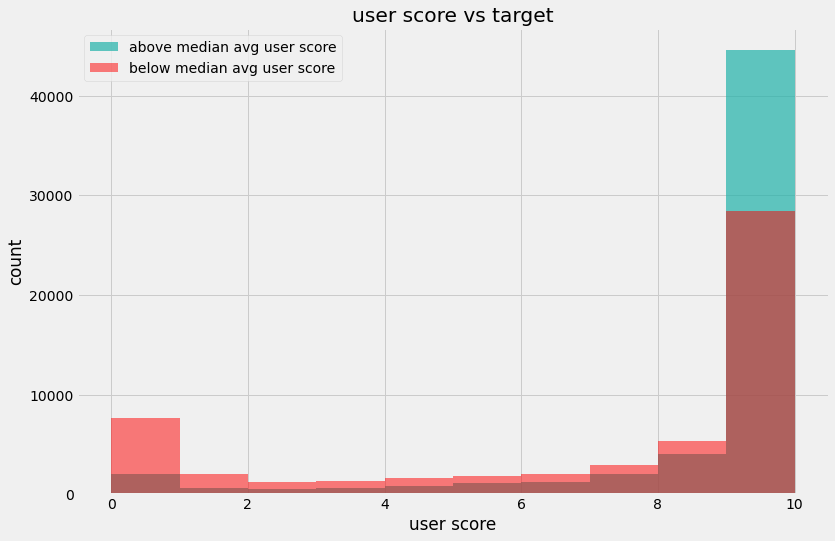

In [58]:
plt.figure(figsize=(12,8))
plt.hist(clean_reviews[clean_reviews['target']==1]['user_score'], 
         bins=10, alpha=0.7, color='lightseagreen', label='above median avg user score')
plt.hist(clean_reviews[clean_reviews['target']==0]['user_score'], 
         bins=10, alpha=0.5, color='red', label='below median avg user score')

plt.xlabel('user score')
plt.ylabel('count')


plt.title('user score vs target')

plt.legend();

### Unsuprisingly reviews with a user score from 9 to 10 are mostly for games that are above the median average user score. The same can be said but on the opposite end with reviews with a user score from 0-1 which are mostly for games that are below the median average user score.


Min of boxplot: 2.50
Max of boxplot: 14.50


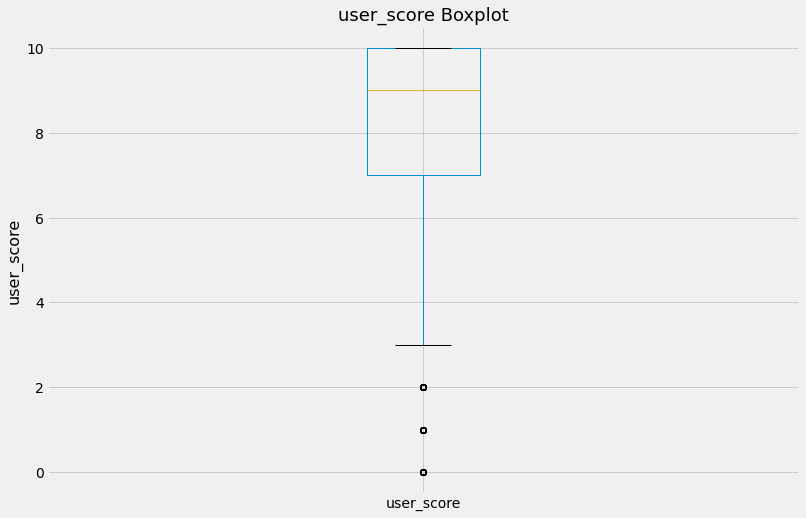

In [59]:
box_plot('user_score')

### Here we can see that score below 2.5 can be considered outliers. We might potentially want to return and remove these outliers before modeling. Interesting as well to see that over 75% of our data has a user score of above 7, which makes sense for a list of the top 100 video games across 6 different consoles.

## Now that we have finished performing our initial EDA we can move on to modeling our data. Before we do that we learned that we have class imbalance in some of our features. We also need to dummy a few of our features and perhaps do some feature engineering to address the class imbalance. We also were made aware of potential outliers that we might want to remove prior to modeling or during a separate iteration of our model. For our columns with text we also need to vectorize our text prior to modeling. 

In [60]:
clean_reviews.to_csv('../data/final_all_console_reviews.csv', index=False)